In [47]:
# importing the libraries
import pandas as pd                   # for data manipulation
import seaborn as sns                 # for data visualisation
import matplotlib.pyplot as plt       # for data visualisation
from sklearn.model_selection import train_test_split           # for splitting the dataset
from sklearn.preprocessing import StandardScaler               # for scaling the dataset
from sklearn.linear_model import LogisticRegression            # Logistic Regression model
from sklearn.metrics import confusion_matrix                   # accuracy measure for the model
from sklearn.metrics import balanced_accuracy_score            # accuracy measure for the model
import numpy as np                                             # for mathematical operations 

For the classification model using logistic regression, the target variable is "Retained".

## Reading the dataset

In [48]:
# reading the cleaned dataset
df = pd.read_csv("Clean_Data.csv")

# displaying the dataframe
df.head()

,Is Captain(1=yes),Is Wktkeeper(1=Yes),Nationality(1=Overseas),Team,IPL 4 Franchise,Player cost USD,matches,innings played,no,runs scored,...,half_centuries_ipl,fours_ipl,sixes_ipl,matches_bowl_ipl,balls_bowled_ipl,total_runs_given_ipl,wickets_taken_ipl,bowling_avg_ipl,economy_ipl,3wickets_ipl
0,0.0,0.0,1,Australia,Mumbai Indians,20000.0,40.0,40.0,3.0,817.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1,South Africa,Royal Challengers Bangalore,20000.0,18.0,18.0,1.0,356.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1,Australia,Kings XI Punjab,20000.0,23.0,8.0,5.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1,South Africa,Royal Challengers Bangalore,20000.0,20.0,20.0,0.0,343.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1,South Africa,Delhi Daredevils,20000.0,25.0,22.0,8.0,213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Distribution of the categories of the target variable

C:\Users\ankit\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retained', ylabel='count'>

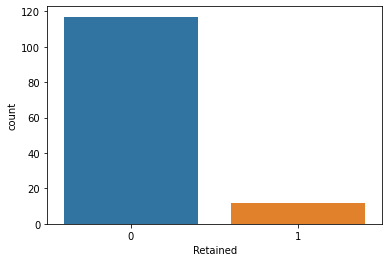

In [49]:
sns.countplot(df['Retained'])

In [50]:
df['Retained'].value_counts()

0    117
1     12
Name: Retained, dtype: int64

In [51]:
117/(117+12)

0.9069767441860465

The two classes are distributed in the ratio of 91:9 in the target variable, hence  this is a case of imbalanced classification.

## Preprocessing the dataset

In [52]:
# one hot encoding the categorical variables with multiple categories
data = pd.get_dummies(df, columns=['Team', 'IPL 4 Franchise'])

In [53]:
# shape of the dataframe
data.shape

(129, 68)

In [54]:
# making the target and predictor dataframes
X = data.drop('Retained', axis=1)
y = data['Retained']

In [55]:
# printing the shapes of the target and predictor dataframes
print(X.shape)
print(y.shape)

(129, 67)
(129,)


## Scaling and Splitting

In [65]:
# scaling the predictor variables
X = StandardScaler().fit_transform(X)

In [66]:
# splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
y_train.value_counts()

0    81
1     9
Name: Retained, dtype: int64

In [88]:
81/(81+9)

0.9

## Logistic Regression Model 1

In [68]:
# initialising the model 
model = LogisticRegression()

In [69]:
# fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
# finding predictions for the test set
y_pred_lr = model.predict(X_test)

In [71]:
balanced_accuracy_score(y_test, y_pred_lr)

0.6388888888888888

In [72]:
confusion_matrix(y_test, y_pred_lr)

array([[34,  2],
       [ 2,  1]], dtype=int64)

# in training set

Class 0 : 90%<br>
Class 1 : 10%

Using the default logistic regression model, the balanced accuracy score comes out as 64% and there are 4 misclassifications. 

Hence, as an improvement over this model, the class weights are specified in the next model. A best practice is to use the inverse of the actual class distributions as the weights to the logistic regression model. Hence, for class 0, the weight will be 10 and 90 for class 1 of the target variable. This ensures that when there is a misclassification of the minority class, here, class 1, the model is penalised more than in the case of a misclassification of the majority class or class 1.

## Logistic Regression Model 2

In [90]:
# initialising the model 
model1 = LogisticRegression(class_weight={0:10, 1:90})

In [91]:
# fitting the model
model1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 10, 1: 90})

In [92]:
# finding predictions for the test set
y_pred_lr = model1.predict(X_test)

In [93]:
balanced_accuracy_score(y_test, y_pred_lr)

0.9722222222222222

In [94]:
confusion_matrix(y_test, y_pred_lr)

array([[34,  2],
       [ 0,  3]], dtype=int64)

The model accuracy improves greatly to 97% and the misclassifications are reduced by half.